# Nautilus.py
References:
- https://en.wikipedia.org/wiki/Nautilus
- https://en.wikipedia.org/wiki/Logarithmic_spiral ("Cutaway of a nautilus shell showing the chambers arranged in an approximately logarithmic spiral. The plotted spiral (dashed blue curve) is based on growth rate parameter b = 0.1759.")

Notes:
- Design goal: distribute a 'shape' (defined by #vane) in a logarithmic spiral, to form the basis of a laser-cut case for Jeremy's nautilus shell. The shape is rotated to radiate from the centre.
- A 'dot' is drawn to mark out the spiral, and, after a certain distance, 'tab cuts' are included. The start/finish of the tab cuts are controlled by C_VANE_BEGIN and C_VANE_END - tweak these to match the dimensions of the shell being encased. The entire object is rotated such that start/end are horizontal.
- #shell defines a sculpted outer perimeter, and C_SHELL_SCALE defines the relative distance the shell is from #vane. #shell can be tweaked, as long as its start and end points are vertically aligned and 100px apart.
- Double-check the scale of any DXF created from this SVG (e.g. via Inkscape) - I've had scaling issues on other projects done this way...

In [4]:
C_A = 5 # starting radius, mm
C_B = 0.1759 #  growth rate parameter, as per above
C_VANE_BEGIN = 780 # degrees
C_VANE_END = 1000 # degrees
C_SHELL_SCALE = 1.5 # shell radius multiplier

C_OUTPUT = '/media/Data/Documents/Jupyter/Nautilus.svg'

In [5]:
from IPython.display import SVG
import math

def getAngleDeg(x1, y1, x2, y2):
    return math.atan2(-(y2 - y1), x2 - x1) / math.pi * 180
    
sSVG = []
sSVG.append('<?xml version="1.0" encoding="UTF-8" standalone="yes"?>')
sSVG.append('<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN" "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">')
sSVG.append('<svg viewBox="-150 -150 300 300" height="300mm" width="300mm" xmlns="http://www.w3.org/2000/svg" xmlns:svg="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" version="1.1">')
sSVG.append('<title>Nautilus</title>')
sSVG.append('<desc>Generated by Nautilus.py</desc>')
sSVG.append('<g id="docRoot" style="overflow:hidden;">')
sSVG.append('<defs>')
sSVG.append('<g id="shell"><path d="m0,0 c-30,0 -30,40 -15,60 s15,30 15,40" fill="none" stroke="#000" stroke-width="0.1" /></g>')
sSVG.append('<g id="vane"><rect x="-9" y="-1.5" width="6" height="3" fill="none" stroke="#000" stroke-width="0.1" /><rect x="3" y="-1.5" width="6" height="3" fill="none" stroke="#000" stroke-width="0.1" /></g>')
sSVG.append('<g id="vaneDebug"><use xlink:href="#vane" x="0" y="0" /><rect x="-15" y="-1.5" width="30" height="3" fill="none" stroke="#F00" stroke-width="0.1" /></g>')
sSVG.append('<g id="vaneSet">')

x = 0
y = 0
fCoords = [0] * 4
for thetaDegrees in range(0, C_VANE_END, 20):
    phi = thetaDegrees * math.pi / 180
    rho = C_A * math.exp(phi * C_B)
    xPrev = x
    yPrev = y
    x = rho * math.cos(phi)
    y = rho * math.sin(phi)
    sSVG.append('<circle cx="' + str(x) + '" cy="' + str(y) + '" r="1" fill="none" stroke="#000" stroke-width="0.1" />')
    # sSVG.append('<circle cx="' + str(x * C_SHELL_SCALE) + '" cy="' + str(y * C_SHELL_SCALE) + '" r="1" fill="none" stroke="#F00" stroke-width="0.1" />')
    if thetaDegrees >= C_VANE_BEGIN:
        if fCoords[0] == 0:
            fCoords[0] = x
            fCoords[1] = y
        # end if
        sSVG.append('<use xlink:href="#vaneDebug" x="' + str(x) + '" y="' + str(y) + '" transform="rotate(' + str(thetaDegrees + 45) + ' ' + str(x) + ' ' + str(y) + ')" />')
        scale = math.sqrt(((x - xPrev) * (x - xPrev)) + ((y - yPrev) * (y - yPrev))) * C_SHELL_SCALE / 100
        sSVG.append('<g transform="rotate(' + str(thetaDegrees - 20) + ' ' + str(xPrev * C_SHELL_SCALE) + ' ' + str(yPrev * C_SHELL_SCALE) + ') translate(' + str(xPrev * C_SHELL_SCALE) + ' ' + str(yPrev * C_SHELL_SCALE) + ')"><use xlink:href="#shell" x="0" y="0" transform="scale(' + str(scale) + ')" /></g>')
    # end if
# end for
fCoords[2] = x
fCoords[3] = y
sSVG.append('</g>')
sSVG.append('</defs>')
sSVG.append('<use xlink:href="#vaneSet" x="0" y="0" transform="rotate(' + str(getAngleDeg(fCoords[0], fCoords[1], fCoords[2], fCoords[3])) + ' 0 0)" />')
sSVG.append('</g>')
sSVG.append('</svg>')

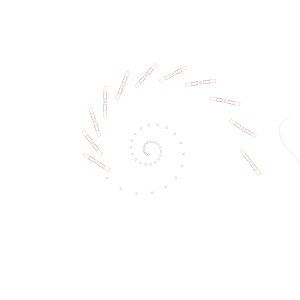

In [6]:
file_out = open(C_OUTPUT, 'w')
file_out.write('\n'.join(sSVG))
file_out.close()

SVG('\n'.join(sSVG))